<a href="https://colab.research.google.com/github/AymericBehaegel/Tablebase-compression/blob/main/TP1_Optimization_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Master IASD**  
**Deep Learning for Image Analisis**

Practical Session #1

In this practical work we seek to compare the performance of different models in the supervised classification task.

Santiago VELASCO-FORERO

Santiago.Velasco@mines-paristech.fr

Deadline: Oct 10 / 2024

In [1]:
#pip install --upgrade keras
#import os
#os.environ["KERAS_BACKEND"] = "jax"
#os.environ["KERAS_BACKEND"] = "pytorch"
#os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import classification_report
print(keras.__version__)

3.4.1


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


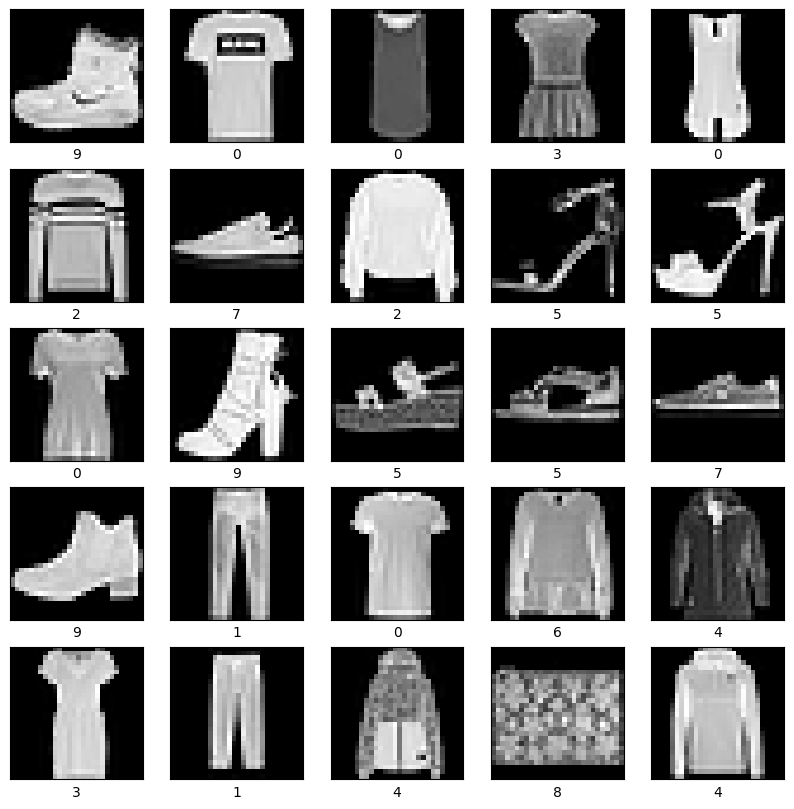

(28, 28)


In [2]:
#Fashion_MNIST
#https://en.wikipedia.org/wiki/Fashion_MNIST
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images=train_images/255.
test_images=test_images/255.

# Visualize some examples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

print(train_images[i].shape)

In [3]:
input_shape=(28,28,1)
num_classes=10

def make_model(input_shape,num_classes):
  #input_shape: The shape of the input images, typically in the form (height, width, channels) where:
  #height is the image height,
  #width is the image width,
  #channels is the number of color channels (e.g., 3 for RGB images).
  #num_classes: The number of possible output categories (i.e., the number of classes for classification).
  input_layer=keras.Input(shape=input_shape)
  conv1=keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu")(input_layer)
  conv2=keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(conv1)
  pool=keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2))(conv2)
  conv3=keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(pool)
  conv4=keras.layers.Conv2D(96, kernel_size=(3, 3), activation="relu")(conv3)
  globalpool=keras.layers.GlobalAveragePooling2D()(conv4)
  dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)
  return keras.Model(input_layer,dense)

In [4]:
model0 = make_model(input_shape,num_classes)
model0.summary()
optimizer = keras.optimizers.SGD(learning_rate=1.)
model0.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,658 (311.16 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 0 (0.00 B)

Question 1: Explain for each layer how the number of parameters is calculated.

Answer 1: Include your answer here.

1.   Convolution : kernel size (e.g. (3,3) -> 3*3=9) times the number of channel of the previous layer + 1 for the bias, then multiply everything by the current number of layer
    1. conv2d : ((3* 3)* 1 + 1)*16 = 160
    2. conv2d : ((3* 3) * 16 +1)*32 = 4640
    3. conv2d_2 : ((3* 3)* 32 +1)* 64 = 18496
    4. conv2d_3 : ((3* 3)* 64 +1)* 96 = 55392
2.   MaxPooling : 0 because we are just picking the max value inside the kernel
3.   MeanPooling : 0 because we are just picking the mean value of the values inside the kernel
4.  Dense : (96+1)*10 because fully connected + bias


In [5]:
num_epochs=36
history_model0 = model0.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1011 - loss: 2.3128 - val_accuracy: 0.1005 - val_loss: 2.3073
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0995 - loss: 2.3098 - val_accuracy: 0.0995 - val_loss: 2.3086
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0962 - loss: 2.3103 - val_accuracy: 0.0957 - val_loss: 2.3185
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0990 - loss: 2.3095 - val_accuracy: 0.0983 - val_loss: 2.3163
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1004 - loss: 2.3099 - val_accuracy: 0.0995 - val_loss: 2.3077
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0996 - loss: 2.3100 - val_accuracy: 0.1003 - val_loss: 2.3101
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0993 - loss: 2.3099 - val_accuracy: 0.0983 - val_loss: 2.3120
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0968 - loss: 2.3106 - 

In [6]:
def make_plot_history(history):
  #Visualize the training process of a neural network by plotting the accuracy and loss over the training epochs for both the training set and validation set.
  #It uses Matplotlib, a popular plotting library in Python, to generate two subplots: one for accuracy and one for loss.
  plt.figure()
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'],label='Training')
  plt.plot(history.history['val_accuracy'],label='Validation')
  plt.grid('on')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.subplot(2,1,2)
  plt.plot(history.history['loss'],label='Training')
  plt.plot(history.history['val_loss'],label='Validation')
  plt.grid('on')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def make_model_analysis(model,x_test,y_test):
  #Function is designed to evaluate a trained neural network model by predicting the classes of test data (x_test) and comparing them to the true labels (y_test).
  #It also generates a classification report that provides detailed performance metrics for each class.
  #classification_report: This function (from Scikit-learn) generates a detailed report of the model’s performance for each class. It includes the following metrics:
  #Precision: The ratio of true positive predictions to the total predicted positives.
  #Recall (Sensitivity): The ratio of true positive predictions to the total actual positives.
  #F1-score: The harmonic mean of precision and recall.
  #Support: The number of true instances for each class.
  y_pred=np.argmax(model.predict(x_test),axis=1)
  print(y_pred.shape)
  print('Predicted Classes', np.unique(y_pred))
  print('Truth Classes', np.unique(y_test))
  target_names = ['T-Shirt', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
  print(classification_report(y_test,y_pred,target_names=target_names))

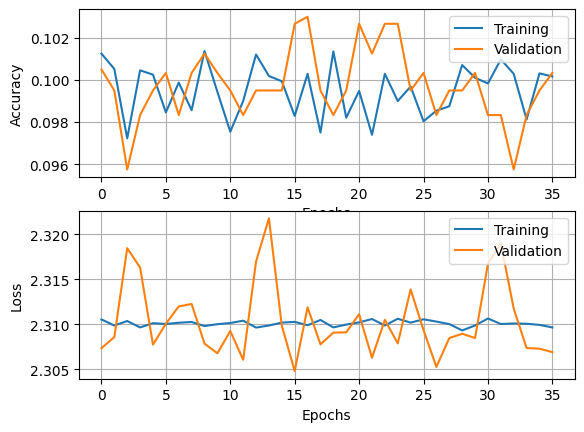

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
(10000,)
Predicted Classes [3]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.00      0.00      0.00      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.00      0.00      0.00      1000
       Dress       0.10      1.00      0.18      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.00      0.00      0.00      1000
       Shirt       0.00      0.00      0.00      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.00      0.00      0.00      1000
  Ankle Boot       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
make_plot_history(history_model0)
make_model_analysis(model0,test_images,test_labels)

Note: The model is not learning.

Q1. Change the learning_rate to a value of 0.001 and train a new model. Call this new model: model1

In [8]:
#Your code for answer Q1:
model1 = make_model(input_shape,num_classes)
model1.summary()
optimizer =  keras.optimizers.SGD(learning_rate=0.001)#COMPLETED
model1.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,658 (311.16 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history_model1 = model1.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1170 - loss: 2.3014 - val_accuracy: 0.1398 - val_loss: 2.2956
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1397 - loss: 2.2935 - val_accuracy: 0.1543 - val_loss: 2.2837
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1454 - loss: 2.2789 - val_accuracy: 0.1456 - val_loss: 2.2553
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1497 - loss: 2.2442 - val_accuracy: 0.1997 - val_loss: 2.1957
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2612 - loss: 2.1677 - val_accuracy: 0.4505 - val_loss: 2.0054
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4705 - loss: 1.8601 - val_accuracy: 0.5281 - val_loss: 1.2950
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.5712 - loss: 1.1881 - val_accuracy: 0.5661 - val_loss: 1.0839
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6135 - loss: 1.0265 -

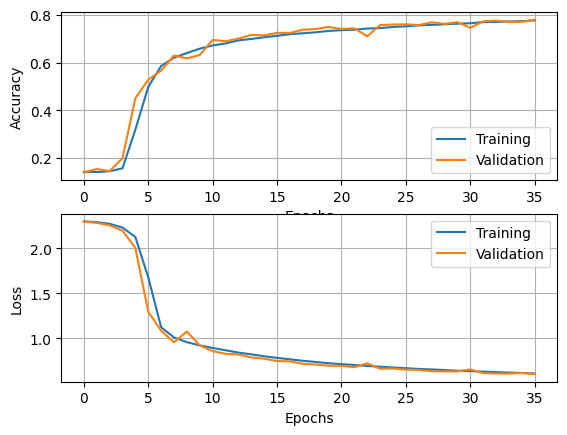

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.68      0.84      0.75      1000
     Trouser       0.93      0.93      0.93      1000
    Pullover       0.56      0.60      0.58      1000
       Dress       0.81      0.78      0.80      1000
        Coat       0.67      0.53      0.59      1000
      Sandal       0.94      0.86      0.90      1000
       Shirt       0.39      0.35      0.37      1000
     Sneaker       0.85      0.89      0.87      1000
         Bag       0.90      0.94      0.92      1000
  Ankle Boot       0.89      0.93      0.91      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [10]:
make_plot_history(history_model1)
make_model_analysis(model1,test_images,test_labels)

Q2. Change the optimizer from SGD to Adam. Call this model as "model2".

In [11]:
#Your code for answer Q2:
model2 = make_model(input_shape,num_classes)
model2.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)#COMPLETED
model2.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,658 (311.16 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history_model2 = model2.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6125 - loss: 1.0496 - val_accuracy: 0.7974 - val_loss: 0.5557
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8078 - loss: 0.5367 - val_accuracy: 0.8397 - val_loss: 0.4553
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8398 - loss: 0.4408 - val_accuracy: 0.8490 - val_loss: 0.4324
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8606 - loss: 0.3871 - val_accuracy: 0.8807 - val_loss: 0.3420
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8741 - loss: 0.3460 - val_accuracy: 0.8783 - val_loss: 0.3372
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8871 - loss: 0.3122 - val_accuracy: 0.8921 - val_loss: 0.3002
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8966 - loss: 0.2917 - val_accuracy: 0.8788 - val_loss: 0.3360
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9024 - loss: 0.2720 - 

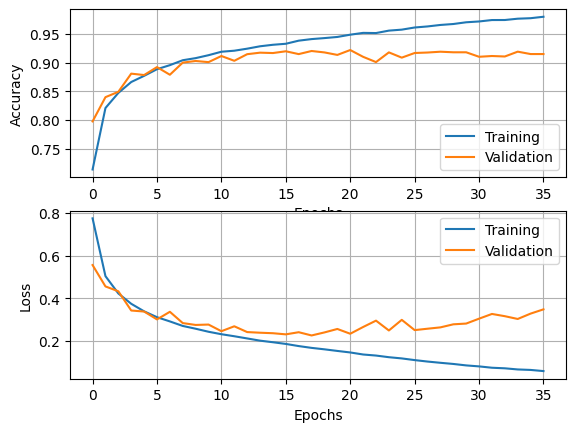

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.85      0.89      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.93      0.83      0.88      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.78      0.93      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.82      0.68      0.75      1000
     Sneaker       0.93      0.98      0.96      1000
         Bag       0.97      0.99      0.98      1000
  Ankle Boot       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [13]:
make_plot_history(history_model2)
make_model_analysis(model2,test_images,test_labels)

Q3: What is your analysis about the performance of Model2?

Answer Q3: The accuracy is higher for Model2 but the loss seems to be a bit higher too. Plus it seems a bit more erratic for model2 and even start performing a bit less well at the end. \\
There is also a notable difference in loss and accuracy for Model2 which may be early signs of overfit.

Q4: Create you create a function "make_model_with_layer_normalization" to define a model as before but adding "LayerNormalization" layer in between each Conv2D and Activation layer. Call this model as "model3"

In [ ]:
#Your code for answer Q4:
def make_model_with_layer_normalization(input_shape,num_classes):
  input_layer=keras.Input(shape=input_shape)
  conv1=keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu")(input_layer)
  norm=keras.layers.LayerNormalization()
  conv2=keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(conv1)
  pool=keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2))(conv2)
  conv3=keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(pool)
  conv4=keras.layers.Conv2D(96, kernel_size=(3, 3), activation="relu")(conv3)
  globalpool=keras.layers.GlobalAveragePooling2D()(conv4) ###COMPLETED
  dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)
  return keras.Model(input_layer,dense)

In [ ]:
model3 = make_model_with_layer_normalization(input_shape,num_classes)
model3.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history_model3 = model3.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

In [ ]:
make_plot_history(history_model3)
make_model_analysis(model3,test_images,test_labels)

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(history_model2.history['loss'],label='without LayerNormalization')
plt.plot(history_model3.history['loss'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.subplot(2,2,2)
plt.plot(history_model2.history['accuracy'],label='without LayerNormalization')
plt.plot(history_model3.history['accuracy'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.subplot(2,2,3)
plt.plot(history_model2.history['val_loss'],label='without LayerNormalization')
plt.plot(history_model3.history['val_loss'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.subplot(2,2,4)
plt.plot(history_model2.history['val_accuracy'],label='without LayerNormalization')
plt.plot(history_model3.history['val_accuracy'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

Q5: What is your analysis about the performance of Model3?

Answer Q5:

Q6: Create you create a function "make_model_with_layer_normalization_and_dropout" to define a model as before but including a dropout layer after global pooling. Call this model as "model4"

In [ ]:
#Your code for answer Q6:
def make_model_with_layer_normalization_and_dropout(input_shape,num_classes):
  input_layer=keras.Input(shape=input_shape)
  ##COMPLETE HERE
  globalpool=keras.layers.Dropout(.1)(globalpool)
  dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)
  return keras.Model(input_layer,dense)

In [ ]:
model4 = make_model_with_layer_normalization_and_dropout(input_shape,num_classes)
model4.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history_model4 = model4.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

In [ ]:
make_plot_history(history_model4)
make_model_analysis(model4,test_images,test_labels)

Q7: Select the best configuration and train this network for 128 epochs, including:
- A reduced learning rate and an early stopping callback.
- Save the best model.
- Plot the confusion matrix of the best model.
- Show examples where the network is not classifing correctly.

Help: https://keras.io/api/callbacks/


In [ ]:
#Include the answer of the Q7

num_epochs=128

model_best = ## COMPLETE HERE
model_best.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_best.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

reduce_lr = keras.callbacks ##COMPLETE
early_stopping = keras.callbacks ##COMPLETE

history_model5 = model_best.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
        callbacks=[reduce_lr,early_stopping]
    )

# Other Questions:


Q8. In your final model "model_best", retrain the model using "batch normalization layer" instead of "layer normalization".

a. Does this model get better results for this problem?

b. Explain why the model with Batch Normalization has fewer parameters than the one using Layer Normalization.

Q9. Which of these techniques can be applied to reduce model overfitting?

1. Layer Normalization
2. Changing SGD by ADAM as optimizer
3. Dropout
4. Data augmentation

Q10. Which of these statements about dropout is correct?

1. Dropout results in sparsity within the trained weights.
2. During testing, dropout is implemented using the inverted keep probability.
3. Increasing the keep probability of a layer enhances the regularization of its weights.
4. None of the above.

Q11. Given the following activation function
$
\texttt{LeakyReLU}(x)=
x \texttt{ if } x>0,
\alpha x \texttt{ if } x≤0
​$.

1. Derive the first derivative with respect to $x$.

2. What is the behavior of the derivative when $\alpha$ goes to zero?

3. How does this can affect backpropagation?



#ExtraPoints :

Q12. Given these two activation functions $\texttt{sigmoid}=\frac{1}{1+\exp(-x)}$ and $\texttt{tanh}(x) = \frac{\exp(x)−\exp(−x)}{\exp(x)+\exp(−x)}$

Show for what value of $a,b$, $ a\texttt{sigmoid}(2x) - b = \texttt{tanh}(x)$


Q13. Given this two well known activation functions:

$\texttt{swish}(x,\beta)= x \texttt{sigmoid}(\beta x)= \frac{x}{1+ \exp^{-\beta x}}$

and,

$\texttt{Relu}(x)=\max(x,0)$

Show that $\texttt{swish}(x,\beta)\to \texttt{Relu}(x)$ when $\beta \to \infty$




